In [2]:
import itertools

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import LinearLocator
from scipy.stats import gompertz
import typing as t

from emevo import birth_and_death as bd

In [3]:
def vis_death_function(
    death_function: t.Callable[[bd.statuses.AgeAndEnergy], bool],
    age_max: int = 1000,
    energy_max: float = 16,
) -> "Figure":
    n_discr = 100
    age_space = np.linspace(0, age_max, n_discr)
    energy_space = np.linspace(-energy_max, energy_max, n_discr)
    death_prob = np.zeros((n_discr, n_discr))
    for i, j in itertools.product(range(n_discr), range(n_discr)):
        status = bd.statuses.AgeAndEnergy(age_space[i], energy_space[j])
        death_prob[j, i] = death_function(status)
    fig = plt.figure("Gompertz", figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(
        *np.meshgrid(age_space, energy_space),
        death_prob,
        cmap=sns.color_palette("rocket", as_cmap=True),
        linewidth=0,
        antialiased=True,
    )
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter("{x:.02f}")
    ax.set_xlim((age_max, 0.0))
    ax.set_ylim((energy_max, -energy_max))
    ax.set_xlabel("Age", fontsize=12)
    ax.set_ylabel("Energy", fontsize=12)
    ax.set_zlabel("Death Prob.", fontsize=14, horizontalalignment="right")
    return fig

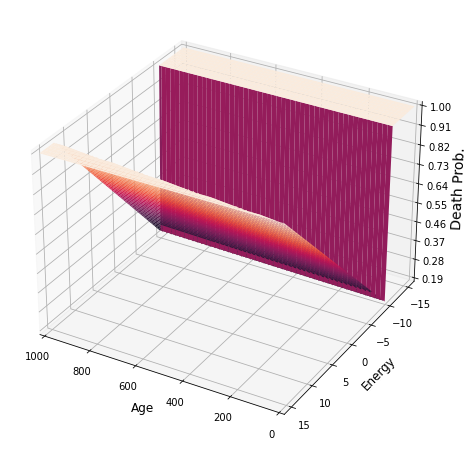

In [4]:
_ = vis_death_function(bd.death_functions.gompertz_hazard(-10, -16, 16))

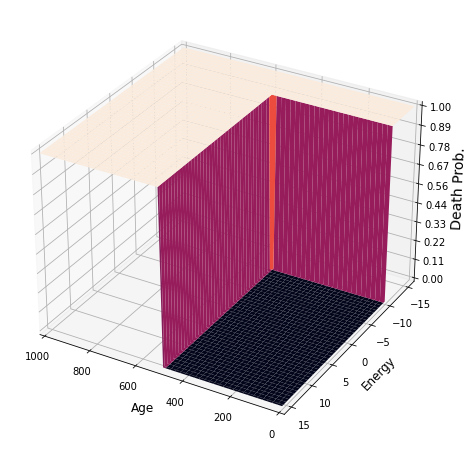

In [5]:
_ = vis_death_function(bd.death_functions.hunger_or_infirmity(-10, 500))

In [6]:
def vis_birth_function(
    birth_function: t.Callable[[bd.statuses.AgeAndEnergy, "Body"], bool],
    age_max: int = 1000,
    energy_max: float = 16,
) -> "Figure":
    n_discr = 100
    age_space = np.linspace(0, age_max, n_discr)
    energy_space = np.linspace(-energy_max, energy_max, n_discr)
    death_prob = np.zeros((n_discr, n_discr))
    for i, j in itertools.product(range(n_discr), range(n_discr)):
        status = bd.statuses.AgeAndEnergy(age_space[i], energy_space[j])
        death_prob[j, i] = birth_function(status, None)
    fig = plt.figure("Gompertz", figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(
        *np.meshgrid(age_space, energy_space),
        death_prob,
        cmap=sns.color_palette("rocket", as_cmap=True),
        linewidth=0,
        antialiased=True,
    )
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter("{x:.02f}")
    ax.set_xlim((age_max, 0.0))
    ax.set_ylim((-energy_max, energy_max))
    ax.set_xlabel("Age", fontsize=12)
    ax.set_ylabel("Energy", fontsize=12)
    ax.set_zlabel("Birth Prob.", fontsize=14, horizontalalignment="right")
    return fig

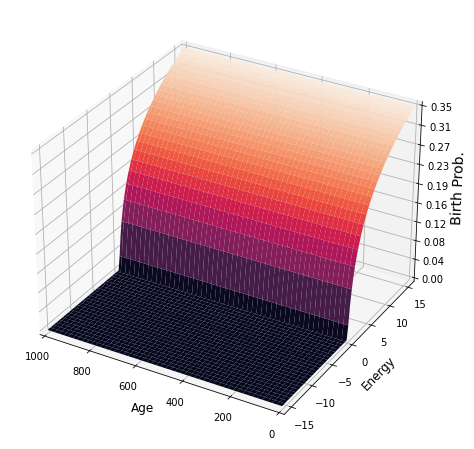

In [7]:
_ = vis_birth_function(bd.birth_functions.log(2.0, 0.1))

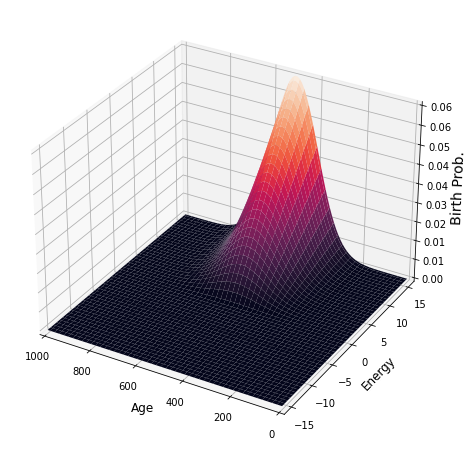

In [9]:
_ = vis_birth_function(bd.birth_functions.normal(500, 100, 1))